In [1]:
import os, math, subprocess
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# some settings for displaying Pandas results
pd.set_option('display.width', 2000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.precision', 4)
pd.set_option('display.max_colwidth', -1)
file_data = 'data.csv'

In [2]:
import seaborn as sns

In [3]:
df = pd.read_csv(file_data)
df.columns = ['Year', 'GDP', 'UPR']
# df

In [4]:
df = df.apply(pd.to_numeric, errors='coerce')
df.head()

,Year,GDP,UPR
0,1980,27.847,NaN
1,1981,13.875,NaN
2,1982,18.405,NaN
3,1983,27.726,NaN
4,1984,48.177,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 3 columns):
Year    39 non-null int64
GDP     39 non-null float64
UPR     29 non-null float64
dtypes: float64(2), int64(1)
memory usage: 1016.0 bytes


In [6]:
def exploring_stats(df_data):
    # check rows, cols
    total_records = df_data.shape[0]
    total_columns = df_data.shape[1]
    print("Total records:", total_records)
    print("Total columns:", total_columns)

    # check dtypes
    name = []
    sub_type = []
    for n, t in df_data.dtypes.iteritems():
        name.append(n)
        sub_type.append(t)

    # check distinct
    ls_ndist = []
    for cname in df_data.columns:
        ndist = df_data[cname].nunique()
        pct_dist = ndist * 100.0 / total_records
        ls_ndist.append("{} ({:0.2f}%)".format(ndist, pct_dist))

    # check missing
    ls_nmiss = []
    for cname in df_data.columns:
        nmiss = df_data[cname].isnull().sum()
        pct_miss = nmiss * 100.0 / total_records
        ls_nmiss.append("{} ({:0.2f}%)".format(nmiss, pct_miss))

    # check zeros
    ls_zeros = []
    for cname in df_data.columns:
        try:
            nzeros = (df_data[cname] == 0).sum()
            pct_zeros = nzeros * 100.0 / total_records
            ls_zeros.append("{} ({:0.2f}%)".format(nzeros, pct_zeros))
        except:
            ls_zeros.append("{} ({:0.2f}%)".format(0, 0))
            continue

    # check negative
    ls_neg = []
    for cname in df_data.columns:
        try:
            nneg = (df_data[cname].astype("float") < 0).sum()
            pct_neg = nneg * 100.0 / total_records
            ls_neg.append("{} ({:0.2f}%)".format(nneg, pct_neg))
        except:
            ls_neg.append("{} ({:0.2f}%)".format(0, 0))
            continue

    # prepare output
    data = {
        "name": name,
        "sub_type": sub_type,
        "n_distinct": ls_ndist,
        "n_miss": ls_nmiss,
        "n_zeros": ls_zeros,
        "n_negative": ls_neg,
    }

    # check stats
    pdf_stats = df_data.describe().transpose()
    ls_stats = []
    for stat in pdf_stats.columns:
        data[stat] = []
        for cname in df_data.columns:
            try:
                data[stat].append(pdf_stats.loc[cname, stat])
            except:
                data[stat].append(0.0)

    # output
    col_ordered = ["sub_type", "n_distinct", "n_miss", "n_negative", "n_zeros",
                   "25%", "50%", "75%", "count", "max", "mean", "min", "std"] 
    pdf_data = pd.DataFrame(data).set_index("name")
    pdf_data = pdf_data[col_ordered]

    return pdf_data



In [7]:
print("Exploring {}".format(file_data))
display( exploring_stats(df))

Exploring data.csv
Total records: 39
Total columns: 3


,sub_type,n_distinct,n_miss,n_negative,n_zeros,25%,50%,75%,count,max,mean,min,std
name,,,,,,,,,,,,,
Year,int64,39 (100.00%),0 (0.00%),0 (0.00%),0 (0.00%),1989.500,1999.000,2008.5000,39.0,2018.000,1999.0000,1980.000,11.4018
GDP,float64,39 (100.00%),0 (0.00%),0 (0.00%),0 (0.00%),22.016,33.873,99.9515,39.0,241.272,67.7161,6.293,68.1957
UPR,float64,24 (61.54%),10 (25.64%),0 (0.00%),0 (0.00%),4.300,5.600,6.4000,29.0,12.300,5.7034,2.100,2.8550


In [8]:
df.describe()

,Year,GDP,UPR
count,39.0000,39.0000,29.0000
mean,1999.0000,67.7161,5.7034
std,11.4018,68.1957,2.8550
min,1980.0000,6.2930,2.1000
25%,1989.5000,22.0160,4.3000
50%,1999.0000,33.8730,5.6000
75%,2008.5000,99.9515,6.4000
max,2018.0000,241.2720,12.3000


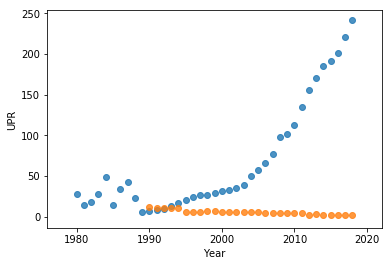

In [9]:
sns.regplot(x="Year", y="GDP", data=df, fit_reg=False)
sns.regplot(x="Year", y="UPR", data=df, fit_reg=False)

<h1> I. Mô hình hóa GDP thường niên: </h1>

<h3>Bước 1: tìm tham số rate (và sai số của mô hình):</h3>

In [10]:
# year_0 = 0

In [11]:
# Tính different theo từng năm của GDP
df["GDP_diff"] = df["GDP"].diff()

In [12]:
df[:5]

,Year,GDP,UPR,GDP_diff
0,1980,27.847,NaN,NaN
1,1981,13.875,NaN,-13.972
2,1982,18.405,NaN,4.530
3,1983,27.726,NaN,9.321
4,1984,48.177,NaN,20.451


In [13]:
# df["GDP_growth"] = df["GDP_diff"] / df["GDP"] * 100
df["GDP_growth"] = df["GDP_diff"] / df["GDP"].shift(1)
df[:5]

,Year,GDP,UPR,GDP_diff,GDP_growth
0,1980,27.847,NaN,NaN,NaN
1,1981,13.875,NaN,-13.972,-0.5017
2,1982,18.405,NaN,4.530,0.3265
3,1983,27.726,NaN,9.321,0.5064
4,1984,48.177,NaN,20.451,0.7376


/home/system-gru/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


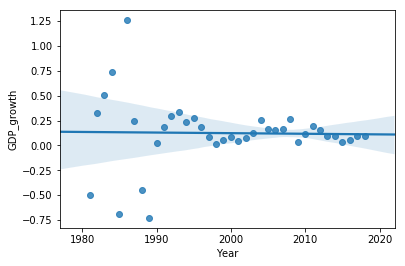

In [14]:
sns.regplot(x="Year", y="GDP_growth", data=df)

/home/system-gru/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/system-gru/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


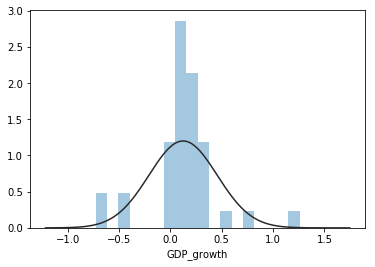

In [15]:
from scipy.stats import norm
sns.distplot(df["GDP_growth"][1:], fit=norm, kde=False)

In [16]:
rate_mu, rate_std = norm.fit(df["GDP_growth"][1:])
rate_mu, rate_std

(0.12325725064640371, 0.3323325694828632)

In [17]:
df["time"] = df["Year"] - 1980

df["GDP_pred"] = df["GDP"] * (1 + rate_mu)
df["GDP_pred"] = df["GDP_pred"].shift(1)

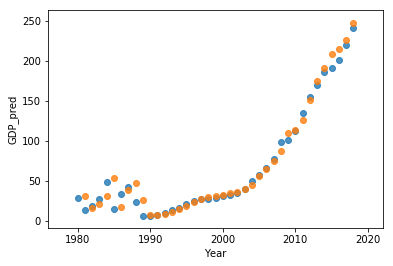

In [18]:
sns.regplot(x="Year", y="GDP", data=df, fit_reg=False)
sns.regplot(x="Year", y="GDP_pred", data=df, fit_reg=False)

Như vậy dựa vào năm trước có thể suy luận khá chính xác năm sau.

<h3>Bước 2: tìm tham số X_0 (GDP ban đầu của Việt Nam):</h3>

In [19]:
gdp_data = df["GDP"].values

In [75]:
x_0 = []

for t in range(10, len(gdp_data)):
    factor = (1 + rate_mu) ** t
    x_0.append(gdp_data[t] / factor)

In [76]:
x0 = np.array(x_0)

In [77]:
x0_mu, x0_std = norm.fit(x0)
x0_mu, x0_std

(3.1800863138431996, 0.4664257598419014)

In [78]:
df["GDP_pred2"] = x0_mu * (1 + rate_mu) ** df.index

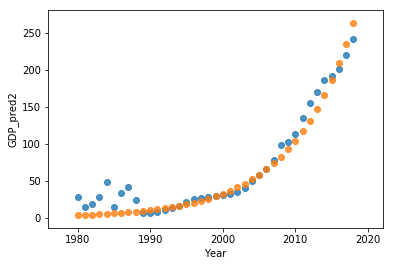

In [79]:
sns.regplot(x="Year", y="GDP", data=df, fit_reg=False)
sns.regplot(x="Year", y="GDP_pred2", data=df, fit_reg=False)

<h1> II. Mô hình hóa tỷ lệ thất nghiệp: </h1>

Tỷ lệ thất nghiệp có thể mô phỏng thông qua cả mô hình linear lẫn exponential growth.

/home/system-gru/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


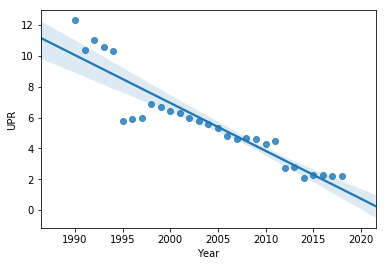

In [27]:
sns.regplot(x="Year", y="UPR", data=df)
# sns.regplot(x="Year", y="UPR", data=df)

<h3> Mô hình 1: Exponential growth </h3>

Làm tương tự với mô hình trên

In [34]:
# Tính different theo từng năm của UPR
df["UPR_diff"] = df["UPR"].diff() / 100

In [56]:
df[10:15]

,Year,GDP,UPR,GDP_diff,GDP_growth,time,GDP_pred,GDP_pred2,UPR_diff
10,1990,6.472,12.3,0.179,0.0284,10,7.0687,10.1679,NaN
11,1991,7.642,10.4,1.170,0.1808,11,7.2697,11.4212,-0.019
12,1992,9.867,11.0,2.225,0.2912,12,8.5839,12.8289,0.006
13,1993,13.181,10.6,3.314,0.3359,13,11.0832,14.4102,-0.004
14,1994,16.312,10.3,3.131,0.2375,14,14.8057,16.1863,-0.003


/home/system-gru/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


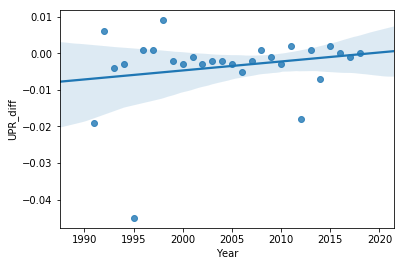

In [50]:
sns.regplot(x="Year", y="UPR_diff", data=df)
# sns.regplot(x="Year", y="GDP_growth", data=df)

/home/system-gru/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/system-gru/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


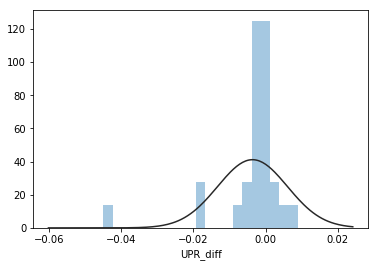

In [51]:
from scipy.stats import norm
sns.distplot(df["UPR_diff"][11:], fit=norm, kde=False)

In [53]:
u_rate_mu, u_rate_std = norm.fit(df["UPR_diff"][11:])
u_rate_mu, u_rate_std

(-0.0036071428571428574, 0.009689240297929474)

<h1> ("Chưa xong") </h1>

<h3> Mô hình 2: Linear Regression </h3>

Hàm y = w * x + b + Normal(0, std)

In [58]:
from scipy import stats

x_time = df["time"][10:]
y_UPR = df["UPR"][10:]

slope, intercept, r_value, p_value, std_err = stats.linregress(x_time, y_UPR)

In [60]:
[slope, intercept, std_err]

[-0.31019704433497536, 13.148177339901478, 0.024499580683192322]

<h1> III. Mô hình hóa quan hệ giữa tỷ lệ thất nghiệp và GDP: </h1>

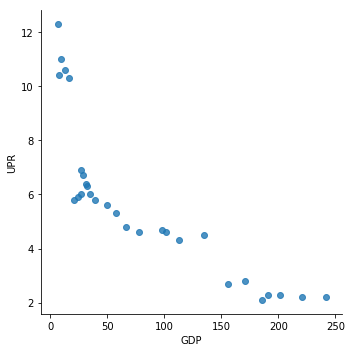

In [69]:
sns.lmplot(x="GDP", y="UPR", data=df, fit_reg=False)

Dựa vào mô hình Okun và biểu đồ trên, ta có thể thấy GDP và UPR có liên quan mật thiết đến nhau. 
Ví dụ như mỗi đơn vị GDP tăng sẽ dẫn đến việc giảm tỷ lệ thất nghiệp. 